In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5.0+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# Install mmcv-full from source, this may take a while
!MMCV_WITH_OPS=1 pip install 'git+https://github.com/open-mmlab/mmcv.git'

# Install mmediting
!rm -rf mmediting
!git clone https://github.com/open-mmlab/mmediting.git
%cd mmediting
!pip install -e .

Looking in links: https://download.pytorch.org/whl/torch_stable.html
Requirement already up-to-date: torch==1.5.0+cu101 in /usr/local/lib/python3.7/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision==0.6.1+cu101 in /usr/local/lib/python3.7/dist-packages (0.6.1+cu101)
  Cloning https://github.com/open-mmlab/mmcv.git to /tmp/pip-req-build-xon0zkk6
  Running command git clone -q https://github.com/open-mmlab/mmcv.git /tmp/pip-req-build-xon0zkk6
  Created wheel for mmcv-full: filename=mmcv_full-1.3.1-cp37-cp37m-linux_x86_64.whl size=23063407 sha256=89a73b7c698473d4c52d82c236b52b09d878ce2ce8a615c238551649f6885fda
  Stored in directory: /tmp/pip-ephem-wheel-cache-jamih4uq/wheels/5f/00/19/440a55ecc7deb9631e96cc70ad68b85505d2a3bdd2cb20b9c3
Successfully built mmcv-full
Cloning into 'mmediting'...
remote: Enumerating objects: 6275, done.
remote: Counting objects: 100% (479/479), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 6275 (delta 238), reused 3

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.5.0+cu101 True
0.6.0


In [ ]:
!mkdir checkpoints
!wget -c https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
    -O checkpoints/deepfillv2_256x256_8x2_places_20200619-10d15793.pth

mkdir: cannot create directory ‘checkpoints’: File exists
--2021-04-23 11:59:48--  https://openmmlab.oss-accelerate.aliyuncs.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth
Resolving openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.75.20.25
Connecting to openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.75.20.25|:443... connected.
HTTP request sent, awaiting response... 200 OK

    The file is already fully retrieved; nothing to do.



In [ ]:
from mmedit.apis import inpainting_inference, init_model

# # Choose to use a config and initialize the mattor
config = './configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py'
# # Setup a checkpoint file to load
checkpoint = './checkpoints/deepfillv2_256x256_8x2_places_20200619-10d15793.pth'
# # Initialize the recognizer
model = init_model(config, checkpoint, device='cuda:0')

Use load_from_local loader


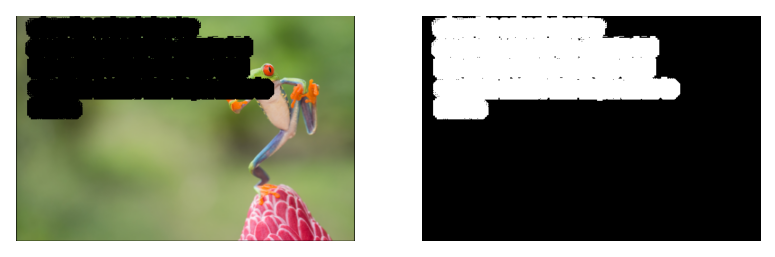

In [ ]:
%matplotlib inline 
import mmcv
from matplotlib import pyplot as plt


# Sample images path
merged_path = '/content/drive/MyDrive/hateful-memes/output/01436.png'
trimap_path = '/content/drive/MyDrive/hateful-memes/output/01436.mask.png'

# Plot sample images
merged = mmcv.imread(merged_path)
trimap = mmcv.imread(trimap_path)
f, axarr = plt.subplots(1, 2)
f.dpi = 160
axarr[0].axis('off')
axarr[0].imshow(mmcv.bgr2rgb(merged))
axarr[1].axis('off')
axarr[1].imshow(trimap)

In [ ]:
from mmedit.core import tensor2img
from google.colab.patches import cv2_imshow
import pandas as pd
import os
from PIL import Image
import numpy as np

In [ ]:
pred_alpha = inpainting_inference(model, merged_path, trimap_path)
result = tensor2img(pred_alpha, min_max=(-1, 1))[..., ::-1]

cv2_imshow(result)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


True

In [ ]:
path = "/content/drive/MyDrive/hateful-memes/output"
for filename in sorted(os.listdir(path)):
  if filename.endswith("mask.png"):
    trimap_path = path + '/' + filename
    trimap = mmcv.imread(trimap_path)
   
    continue
  else:
    
    merged_path = path + '/' + filename
    merged = mmcv.imread(merged_path)
  
  f, axarr = plt.subplots(1, 2)
  f.dpi = 160
  axarr[0].axis('off')
  axarr[0].imshow(mmcv.bgr2rgb(merged))
  axarr[1].axis('off')
  axarr[1].imshow(trimap)
 

  pred_alpha = inpainting_inference(model, merged_path, trimap_path)
  result = tensor2img(pred_alpha, min_max=(-1, 1))[..., ::-1]
  
  mmcv.imwrite( result,'/content/drive/MyDrive/hateful-memes/img_without_text' +'/' + filename )

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
